# Code for generating Fig. 10

## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from alphashape import alphashape
import json
from matplotlib.colors import LogNorm

#Getting the full manifold data
df = pd.read_csv('no_avg_dataset.csv')

#Getting the alpha shape
z_array = np.concatenate((np.asarray(df["Z0"]).reshape(-1,1), np.asarray(df["Z1"]).reshape(-1,1)), axis = 1)
alpha_shape = alphashape(z_array, alpha = 1)

# Getting the norm data
with open('norm_data.json', 'r') as f:
    loaded_list_of_dicts = json.load(f)
loaded_data = [{k: np.array(v) for k, v in d.items()} for d in loaded_list_of_dicts]


### Alpha shape plotting function

In [6]:
def plot_alpha_shape(alpha_shape, ax = None):
    if ax is None:
        plt.plot(*alpha_shape.exterior.xy, color='black', linewidth=0.5,alpha = 0.7, label='Alpha Shape')
        
    else:
        ax.plot(*alpha_shape.exterior.xy, color='black', linewidth=0.5,alpha = 0.7, label='Alpha Shape')

## Plotting

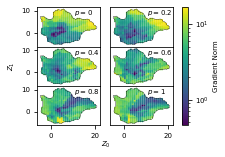

In [7]:
# Figure specs
fig_width_in = 8.3 /2.54 
aspect_ratio = 1.5
fig_height_in = fig_width_in / aspect_ratio
fontsize = 7

# Defining figure
fig, axs = plt.subplots(3,2, figsize = (fig_width_in, fig_height_in), sharex = True, sharey = True)

# Defining ps to plot and subplot location for those ps
plotting_ps = [0, 0.2, 0.4, 0.6, 0.8, 1]
subplot_dict = {0: (0,0), 0.2: (0,1), 0.4:(1,0), 0.6: (1,1), 0.8:(2,0), 1:(2,1)}

# Plotting each p 
for  p in plotting_ps:
    # Get data for this p
    dict_index = int(p*10)
    data_dict = loaded_data[dict_index]
    magnitude = data_dict['magnitude']
    row_and_norm_arr = data_dict['row_and_norm_arr']

    # Figure out what subplot to plot on
    subplot_loc = subplot_dict[p]
    plot_r, plot_c = subplot_loc

    # Plot norm and add p value to the plot
    plot = axs[plot_r, plot_c].scatter(row_and_norm_arr[:,0].reshape(-1,1), row_and_norm_arr[:,1].reshape(-1,1), c = magnitude, cmap = 'viridis', s = 1, norm = LogNorm() )
    plot_alpha_shape(alpha_shape, ax = axs[plot_r, plot_c])
    axs[plot_r, plot_c].text(10.5, 8, r'$p={}$'.format(p), fontsize = fontsize)
    axs[plot_r, plot_c].set_aspect('equal')
    axs[plot_r, plot_c].tick_params(axis = 'y', labelsize = fontsize)
    axs[plot_r, plot_c].tick_params(axis = 'x', labelsize = fontsize)

    # Set ticks
    axs[plot_r, plot_c].get_xaxis().set_visible(False)
    axs[plot_r, plot_c].get_yaxis().set_visible(False)

    # Set subplot aspect ratio
    axs[plot_r, plot_c].set_aspect('equal')

    # Label y axis for the middle row only
    if plot_r == 1 and plot_c == 0:
        axs[plot_r, plot_c].set_ylabel(r'$Z_1$', fontsize = fontsize)

    # Showing ticks for left column and bottom row only 
    if plot_c == 0:
        axs[plot_r, plot_c].get_yaxis().set_visible(True)
    if plot_r == 2:
        axs[plot_r, plot_c].get_xaxis().set_visible(True)

# Adjusting plots
plt.subplots_adjust(hspace = 0, wspace = 0)
cbar = fig.colorbar(plot, ax = axs.ravel().tolist(), orientation = 'vertical')
cbar.ax.tick_params(labelsize=fontsize) 
cbar.set_label("Gradient Norm", fontsize = fontsize)
columns = 2
middle_x = 0.5 / columns + 0.5 * (1 - 0.5 / columns)

# Setting x axis label 
fig.supxlabel(x = 0.46, y = -0.03, t = r'$Z_0$', fontsize = fontsize)

# Show figure
plt.show()

### Save figure

In [16]:
fig.savefig('norm_plots_fig_10.pdf', dpi = 600, bbox_inches = 'tight')